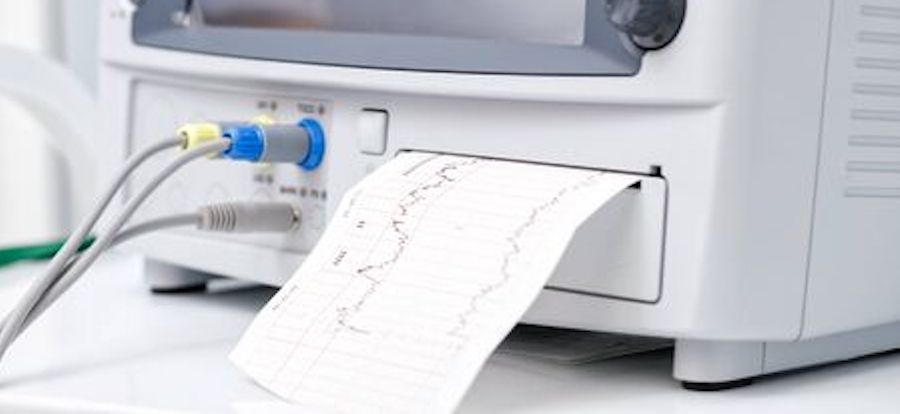

# Fetal Health Classification 
### Author: Diane Tunnicliffe

## Overview
"Fetal mortality is a major, but often overlooked, public health problem." According to the National Center for Health Statistics, about 1 million fetal deaths occur in the United States each year, with almost 26,000 being over the age of 20 weeks gestation. After decades of decline, the US fetal mortality rate has plateaued at this shockingly high number. With fetal mortality comes greater risk of adverse maternal health outcomes, as well as maternal mortality risk increase. 
Cardiotocograms (CTGs) measure values such as fetal heart rate, fetal movement, and uterine contractions. "CTGs are a simple and cost-accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality."  

Using data from actual patients' CTG exams and their accomponaying fetal health outcomes assigned by expert obstetricians, I have determined that automated assessment of fetal health is possible using CTG data.

## Business Problem

Since fetal risk and mortality is such a devastating problem, what can be done to decrease these numbers and preserve maternal and fetal health? I will be answering the question of how to predict fetal health outcomes based on CTG data. This information can be used by medical professionals, specifically in the field of obstetrics, to minimize the occurrence of fetal mortality. While this is arguably more of a health problem than a business problem, medical practices can benefit greatly from these findings by ensuring the best possible patient health.  
I will be working towards answering the following questions:
1. Can performing CTGs as preventative care help predict fetal health outcomes?
2. If so, which measures on a CTG exam are most significant when predicting fetal health outcomes?
3. What can an individual healthcare provider do to help the global cause of decreasing fetal mortality? What exactly should be prioritized?

### Hypotheses  

Null hypothesis (H0): There is no relationship between automated CTG data and fetal health outcome.  
Alternative hypothesis (Ha): There is a relationship between automated CTG data and fetal health outcome. 

## Data Understanding
"Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more."  

The dataset used for this project can be found at https://www.kaggle.com/andrewmvd/fetal-health-classification. It contains 2,126 rows of 22 features extracted from Cardiotocogram (CTG) exams, which were then classified by three expert obstetritians into 3 classes:
* Normal
* Suspect 
* Pathological  


Citation: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318. The original study can be found at https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9. 



In [678]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectPercentile
from tpot import TPOTClassifier
from tpot.export_utils import set_param_recursive
import xgboost
import eli5


%matplotlib inline

In [679]:
# reading the csv file
df = pd.read_csv('data/fetal_health.csv')
# previewing the DataFrame
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0         120.000          0.000           0.000                 0.000   
1         132.000          0.006           0.000                 0.006   
2         133.000          0.003           0.000                 0.008   
3         134.000          0.003           0.000                 0.008   
4         132.000          0.007           0.000                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                 0.000                     0.000   
1                0.003                 0.000                     0.000   
2                0.003                 0.000                     0.000   
3                0.003                 0.000                     0.000   
4                0.000                 0.000                     0.000   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                           73.000                                 0.500   
1                           17.000                                 2.100   
2                           16.000                                 2.100   
3                           16.000                                 2.400   
4                           16.000                                 2.400   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                             43.000       ...         62.000   
1                                              0.000       ...         68.000   
2                                              0.000       ...         68.000   
3                                              0.000       ...         53.000   
4                                              0.000       ...         53.000   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0        126.000                      2.000                       0.000   
1        198.000                      6.000                       1.000   
2        198.000                      5.000                       1.000   
3        170.000                     11.000                       0.000   
4        170.000                      9.000                       0.000   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0         120.000         137.000           121.000              73.000   
1         141.000         136.000           140.000              12.000   
2         141.000         135.000           138.000              13.000   
3         137.000         134.000           137.000              13.000   
4         137.000         136.000           138.000              11.000   

   histogram_tendency  fetal_health  
0               1.000         2.000  
1               0.000         1.000  
2               0.000         1.000  
3               1.000         1.000  
4               1.000         1.000  

[5 rows x 22 columns]

In [680]:
# getting info for DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [681]:
df.shape

(2126, 22)

In [682]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count        2126.000       2126.000        2126.000              2126.000   
mean          133.304          0.003           0.009                 0.004   
std             9.841          0.004           0.047                 0.003   
min           106.000          0.000           0.000                 0.000   
25%           126.000          0.000           0.000                 0.002   
50%           133.000          0.002           0.000                 0.004   
75%           140.000          0.006           0.003                 0.007   
max           160.000          0.019           0.481                 0.015   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count             2126.000              2126.000                  2126.000   
mean                 0.002                 0.000                     0.000   
std                  0.003                 0.000                     0.001   
min                  0.000                 0.000                     0.000   
25%                  0.000                 0.000                     0.000   
50%                  0.000                 0.000                     0.000   
75%                  0.003                 0.000                     0.000   
max                  0.015                 0.001                     0.005   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                         2126.000                              2126.000   
mean                            46.990                                 1.333   
std                             17.193                                 0.883   
min                             12.000                                 0.200   
25%                             32.000                                 0.700   
50%                             49.000                                 1.200   
75%                             61.000                                 1.700   
max                             87.000                                 7.000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                           2126.000       ...   
mean                                               9.847       ...   
std                                               18.397       ...   
min                                                0.000       ...   
25%                                                0.000       ...   
50%                                                0.000       ...   
75%                                               11.000       ...   
max                                               91.000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count       2126.000       2126.000                   2126.000   
mean          93.579        164.025                      4.068   
std           29.560         17.944                      2.949   
min           50.000        122.000                      0.000   
25%           67.000        152.000                      2.000   
50%           93.000        162.000                      3.000   
75%          120.000        174.000                      6.000   
max          159.000        238.000                     18.000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                    2126.000        2126.000        2126.000   
mean                        0.324         137.452         134.611   
std                         0.706          16.381          15.594   
min                         0.000          60.000          73.000   
25%                         0.000         129.000         125.000   
50%                         0.000         139.000         136.000   
75%                         0.000         148.000         145.000   
max                        10.000         187.000         182.000   

       histogram_median  histogr

In [683]:
# renaming baseline value column to make it easier to work with
df = df.rename(columns = {'baseline value':'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations'})
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

The columns are described from the data source as follows: 

* baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)  
* accelerations - Number of accelerations per second  
* fetal_movement - Number of fetal movements per second  
* uterine_contractions - Number of uterine contractions per second  
* light_decelerations - Number of light decelerations per second  
* severe_decelerations - Number of severe decelerations per second  
* prolongued_decelerations - Number of prolonged decelerations per second 
* abnormal_short_term_variability - Percentage of time with abnormal short-term variability  
* mean_value_of_short_term_variability - Mean value of short-term variability  
* percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability  
* mean_value_of_long_term_variability - Mean value of long-term variability 
* histogram_width - Width of FHR histogram (generated from exam)  
* histogram_min - Minimum of FHR histogram (generated from exam)  
* histogram_max - Maximum of FHR histogram (generated from exam)  
* histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)  
* histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)  
* histogram_mode - Mode of FHR histogram (generated from exam)  
* histogram_mean - Mean of FHR histogram (generated from exam)  
* histogram_median - Median of FHR histogram (generated from exam)  
* histogram_variance - Variance of FHR histogram (generated from exam)  
* histogram_tendency - Tendency of FHR histogram (generated from exam)  
* fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological           

In [684]:
# getting value counts for fetal accelerations column
df.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

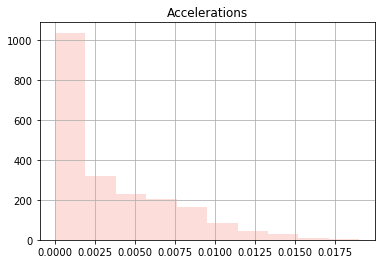

In [685]:
# plotting acceleration frequencies
sns.set_palette(palette='RdPu')
df.accelerations.hist()
plt.title('Accelerations');

The majority of observed fetal heart rate accelerations were 0.00. 

In [686]:
# getting value counts for fetal movement column
df.fetal_movement.value_counts()

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.340       1
0.383       1
0.092       1
0.032       1
0.306       1
Name: fetal_movement, Length: 102, dtype: int64

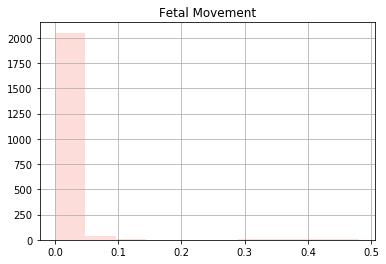

In [687]:
# plotting fetal movement frequencies
df.fetal_movement.hist()
plt.title('Fetal Movement');

The fetal movement value with the highest frequency is once again 0.00.

In [688]:
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

There were only 7 observed severe decelerations in the dataset.

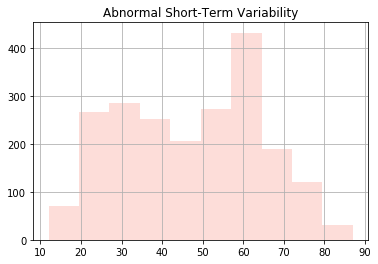

In [689]:
df.abnormal_short_term_variability.hist()
plt.title('Abnormal Short-Term Variability');

This column is a measure of the percentage of time with abnormal short-term variability. According to the American Academy of Family Physicians (AAFP.org), short-term variability of the fetal heart rate is defined as "the oscillation of the FHR around the baseline in amplitude of 5 to 10 bpm." In other words, it is normal and expected to have some variability of the fetal heart rate around the baseline. However, this column is a measure of the percentage of time that an abnormal variability was observed. Considering that most of the fetal health outcomes were normal, I found it surprising that there were quite a few records with high abnormal percentages of short-term variability.

In [690]:
df.histogram_width.describe()

count   2126.000
mean      70.446
std       38.956
min        3.000
25%       37.000
50%       67.500
75%      100.000
max      180.000
Name: histogram_width, dtype: float64

In [691]:
df.histogram_min.describe()

count   2126.000
mean      93.579
std       29.560
min       50.000
25%       67.000
50%       93.000
75%      120.000
max      159.000
Name: histogram_min, dtype: float64

In [692]:
df.histogram_max.describe()

count   2126.000
mean     164.025
std       17.944
min      122.000
25%      152.000
50%      162.000
75%      174.000
max      238.000
Name: histogram_max, dtype: float64

In [693]:
df.corr()

baseline_value  \
baseline_value                                               1.000   
accelerations                                               -0.081   
fetal_movement                                              -0.033   
uterine_contractions                                        -0.146   
light_decelerations                                         -0.159   
severe_decelerations                                        -0.054   
prolonged_decelerations                                     -0.105   
abnormal_short_term_variability                              0.306   
mean_value_of_short_term_variability                        -0.280   
percentage_of_time_with_abnormal_long_term_vari...           0.286   
mean_value_of_long_term_variability                         -0.032   
histogram_width                                             -0.148   
histogram_min                                                0.362   
histogram_max                                                0.275   
histogram_number_of_peaks                                   -0.114   
histogram_number_of_zeroes                                  -0.005   
histogram_mode                                               0.709   
histogram_mean                                               0.723   
histogram_median                                             0.789   
histogram_variance                                          -0.134   
histogram_tendency                                           0.294   
fetal_health                                                 0.148   

                                                    accelerations  \
baseline_value                                             -0.081   
accelerations                                               1.000   
fetal_movement                                              0.048   
uterine_contractions                                        0.090   
light_decelerations                                        -0.109   
severe_decelerations                                       -0.043   
prolonged_decelerations                                    -0.128   
abnormal_short_term_variability                            -0.280   
mean_value_of_short_term_variability                        0.207   
percentage_of_time_with_abnormal_long_term_vari...         -0.374   
mean_value_of_long_term_variability                        -0.142   
histogram_width                                             0.299   
histogram_min                                              -0.154   
histogram_max                                               0.394   
histogram_number_of_peaks                                   0.190   
histogram_number_of_zeroes                                 -0.006   
histogram_mode                                              0.244   
histogram_mean                                              0.270   
histogram_median                                            0.273   
histogram_variance                                          0.126   
histogram_tendency                                          0.028   
fetal_health                                               -0.364   

                                                    fetal_movement  \
baseline_value                                              -0.033   
accelerations                                                0.048   
fetal_movement                                               1.000   
uterine_contractions                                        -0.069   
light_decelerations                                          0.049   
severe_decelerations                                        -0.011   
prolonged_decelerations                                      0.266   
abnormal_short_term_variability                             -0.104   
mean_value_of_short_term_variability                         0.121   
percentage_of_time_with_abnormal_long_term_vari...          -0.074   
mean_value_of_long_term_variability                          0.011   
histogram_wid

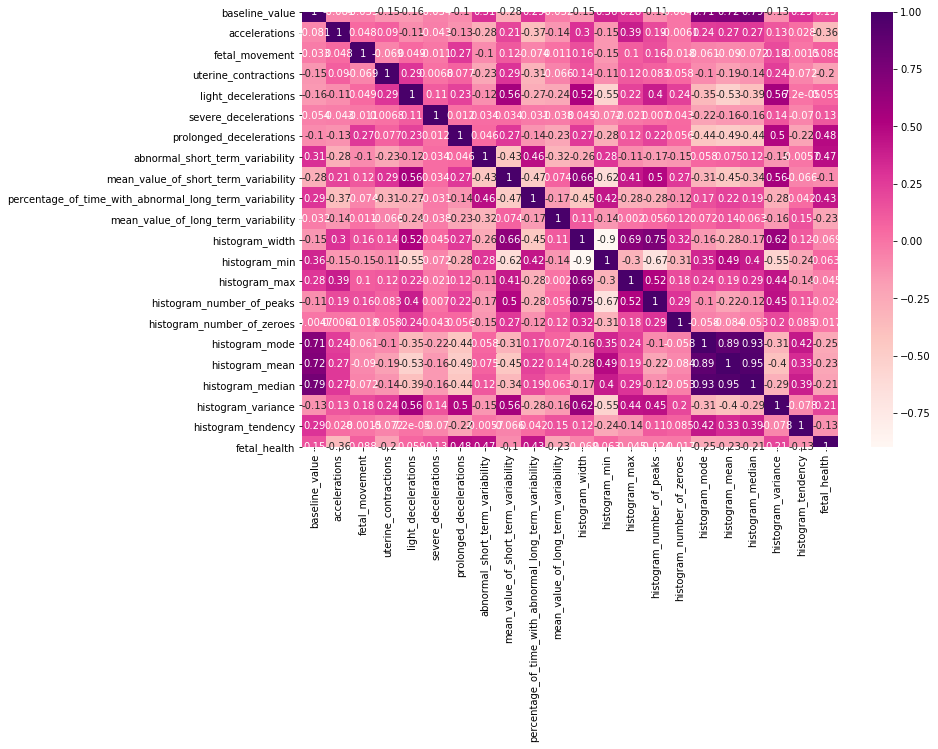

In [694]:
# generate heatmap to display correlations in data
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");

The feature showing the strongest correlation with fetal health is prolonged decelerations, with a correlation of 0.485. There are moderate correlations also observed between fetal health and abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability. 

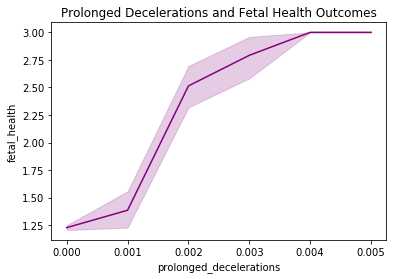

In [695]:
sns.set_palette(palette='RdPu_r')
sns.lineplot('prolonged_decelerations','fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Health Outcomes')
plt.savefig('./images/fig1.png');

This lineplot clearly shows the relationship between prolonged decelerations of fetal heart rate and fetal health outcome. The longer amount of time observed with prolonged decelerations, the more at-risk the health outcome was likely to be.

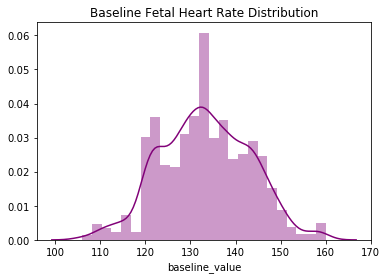

In [696]:
sns.set_palette(palette='RdPu_r')
sns.distplot(df['baseline_value'])
plt.title('Baseline Fetal Heart Rate Distribution');

The vast majority of the baseline values for fetal heart rate were 0.06.  

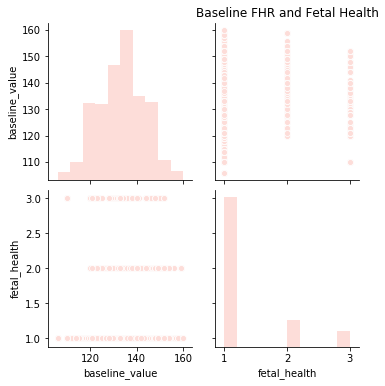

In [697]:
sns.set_palette(palette='RdPu')
sns.pairplot(df[['baseline_value', 'fetal_health']])
plt.title('Baseline FHR and Fetal Health');

There was no obvious relationship between baseline fetal heart rate and fetal health outcome.

In [698]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [699]:
histogram_columns = ['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

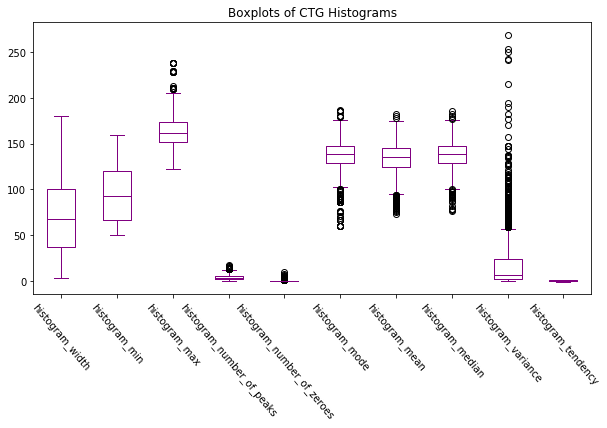

In [700]:
df[histogram_columns].plot(kind='box',grid=False, color='Purple', figsize=(10,5));
plt.xticks(rotation=(-50))
plt.title('Boxplots of CTG Histograms');

A lot of the features in this dataset pertained to the actual histogram that is printed out during the duration of the CTG. They aren't particularly intuitive, and it seems that the significance of the CTG histogram measurements was somewhat ambiguous. But before I got rid of these columns, I was curious how these measurements would impact the prediction of fetal health outcomes.

## Data Preparation

In [701]:
# checking for null values
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

This dataset had no null values to be dealt with.

In [702]:
# checking value counts for target variable
df.fetal_health.value_counts()

1.000    1655
2.000     295
3.000     176
Name: fetal_health, dtype: int64

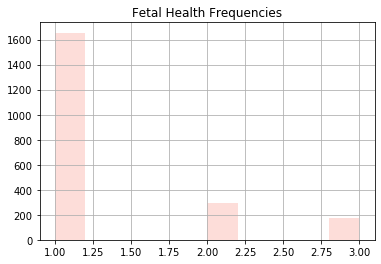

In [703]:
# plotting target variable frequencies
df.fetal_health.hist()
plt.title('Fetal Health Frequencies');

### Feature Engineering
The target class, fetal health, is very unbalanced. The majority of the fetal health outcomes observed in this dataset are 1.00, which is the designation for Normal fetal health. The class with the second-highest frequency is the 2.00 or Suspect fetal health class. The class with the lowest frequency in this dataset is 3.00 or Pathological fetal health.  
To make the data slightly easier to work with and understand, and turn this into a binary classification problem, I combined the 2.00 and 3.00 classes of Suspect and Pathological fetal health into a category called At Risk. I designated all the values of 1.00 as Normal.

In [704]:
# engineering new categorical target column for Normal and At Risk fetal health
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

I then removed the original fetal_health column from the dataframe.

In [705]:
df = df.drop(columns='fetal_health', axis=1)

In [706]:
df.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
0         120.000          0.000           0.000                 0.000   
1         132.000          0.006           0.000                 0.006   
2         133.000          0.003           0.000                 0.008   
3         134.000          0.003           0.000                 0.008   
4         132.000          0.007           0.000                 0.008   

   light_decelerations  severe_decelerations  prolonged_decelerations  \
0                0.000                 0.000                    0.000   
1                0.003                 0.000                    0.000   
2                0.003                 0.000                    0.000   
3                0.003                 0.000                    0.000   
4                0.000                 0.000                    0.000   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                           73.000                                 0.500   
1                           17.000                                 2.100   
2                           16.000                                 2.100   
3                           16.000                                 2.400   
4                           16.000                                 2.400   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                             43.000       ...         62.000   
1                                              0.000       ...         68.000   
2                                              0.000       ...         68.000   
3                                              0.000       ...         53.000   
4                                              0.000       ...         53.000   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0        126.000                      2.000                       0.000   
1        198.000                      6.000                       1.000   
2        198.000                      5.000                       1.000   
3        170.000                     11.000                       0.000   
4        170.000                      9.000                       0.000   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0         120.000         137.000           121.000              73.000   
1         141.000         136.000           140.000              12.000   
2         141.000         135.000           138.000              13.000   
3         137.000         134.000           137.000              13.000   
4         137.000         136.000           138.000              11.000   

   histogram_tendency  fh_outcome  
0               1.000     At Risk  
1               0.000      Normal  
2               0.000      Normal  
3               1.000      Normal  
4               1.000      Normal  

[5 rows x 22 columns]

In [707]:
df.fh_outcome.value_counts()

Normal     1655
At Risk     471
Name: fh_outcome, dtype: int64

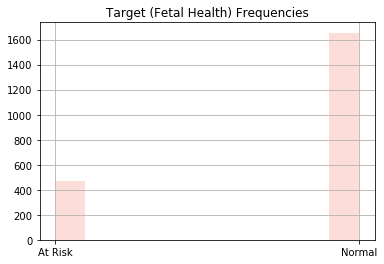

In [708]:
# plotting target frequencies
df.fh_outcome.hist()
plt.title('Target (Fetal Health) Frequencies');

This is still very unbalanced, but is somewhat more straightforward as a binary classification problem. And if we are working to maximize fetal health, then any member of an at-risk category should be treated with seriousness and urgency.

### Encoding

In [710]:
df.dtypes

baseline_value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolonged_decelerations                                   float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Every feature in the CTG data was already numerical (float) so there was not much encoding necessary, aside from the target variable. With that being said, I opted to tackle the encoding of the target variable using pd.get_dummies.

In [711]:
df = pd.get_dummies(df, columns=['fh_outcome'])
df.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
0         120.000          0.000           0.000                 0.000   
1         132.000          0.006           0.000                 0.006   
2         133.000          0.003           0.000                 0.008   
3         134.000          0.003           0.000                 0.008   
4         132.000          0.007           0.000                 0.008   

   light_decelerations  severe_decelerations  prolonged_decelerations  \
0                0.000                 0.000                    0.000   
1                0.003                 0.000                    0.000   
2                0.003                 0.000                    0.000   
3                0.003                 0.000                    0.000   
4                0.000                 0.000                    0.000   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                           73.000                                 0.500   
1                           17.000                                 2.100   
2                           16.000                                 2.100   
3                           16.000                                 2.400   
4                           16.000                                 2.400   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_max  \
0                                             43.000       ...        126.000   
1                                              0.000       ...        198.000   
2                                              0.000       ...        198.000   
3                                              0.000       ...        170.000   
4                                              0.000       ...        170.000   

   histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
0                      2.000                       0.000         120.000   
1                      6.000                       1.000         141.000   
2                      5.000                       1.000         141.000   
3                     11.000                       0.000         137.000   
4                      9.000                       0.000         137.000   

   histogram_mean  histogram_median  histogram_variance  histogram_tendency  \
0         137.000           121.000              73.000               1.000   
1         136.000           140.000              12.000               0.000   
2         135.000           138.000              13.000               0.000   
3         134.000           137.000              13.000               1.000   
4         136.000           138.000              11.000               1.000   

   fh_outcome_At Risk  fh_outcome_Normal  
0                   1                  0  
1                   0                  1  
2                   0                  1  
3                   0                  1  
4                   0                  1  

[5 rows x 23 columns]

In [712]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fh_outcome_At Risk', 'fh_outcome_Normal'],
      dtype='object')

In [713]:
df = df.drop(columns=['fh_outcome_Normal'], axis=1)
df.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
0         120.000          0.000           0.000                 0.000   
1         132.000          0.006           0.000                 0.006   
2         133.000          0.003           0.000                 0.008   
3         134.000          0.003           0.000                 0.008   
4         132.000          0.007           0.000                 0.008   

   light_decelerations  severe_decelerations  prolonged_decelerations  \
0                0.000                 0.000                    0.000   
1                0.003                 0.000                    0.000   
2                0.003                 0.000                    0.000   
3                0.003                 0.000                    0.000   
4                0.000                 0.000                    0.000   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                           73.000                                 0.500   
1                           17.000                                 2.100   
2                           16.000                                 2.100   
3                           16.000                                 2.400   
4                           16.000                                 2.400   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                             43.000       ...         62.000   
1                                              0.000       ...         68.000   
2                                              0.000       ...         68.000   
3                                              0.000       ...         53.000   
4                                              0.000       ...         53.000   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0        126.000                      2.000                       0.000   
1        198.000                      6.000                       1.000   
2        198.000                      5.000                       1.000   
3        170.000                     11.000                       0.000   
4        170.000                      9.000                       0.000   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0         120.000         137.000           121.000              73.000   
1         141.000         136.000           140.000              12.000   
2         141.000         135.000           138.000              13.000   
3         137.000         134.000           137.000              13.000   
4         137.000         136.000           138.000              11.000   

   histogram_tendency  fh_outcome_At Risk  
0               1.000                   1  
1               0.000                   0  
2               0.000                   0  
3               1.000                   0  
4               1.000                   0  

[5 rows x 22 columns]

In [714]:
df['fh_outcome_At Risk'].value_counts()

0    1655
1     471
Name: fh_outcome_At Risk, dtype: int64

In [715]:
df = df.rename(columns={'fh_outcome_At Risk':'target'})
df.target.value_counts()

0    1655
1     471
Name: target, dtype: int64

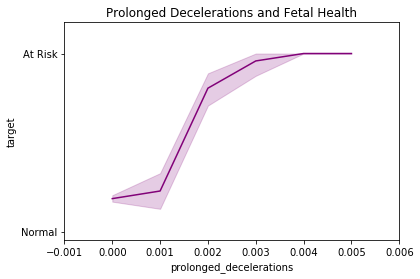

In [721]:
sns.set_palette(palette='RdPu_r')
sns.lineplot('prolonged_decelerations','target', data=df, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

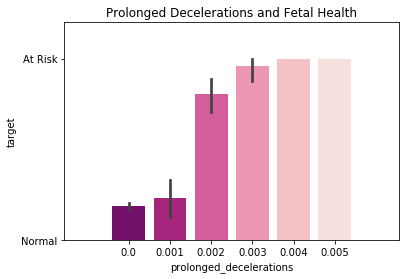

In [722]:
sns.set_palette(palette='RdPu_r')
sns.barplot('prolonged_decelerations','target', data=df)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

There is a visible relationship between prolonged fetal heart rate decelerations and fetal health.

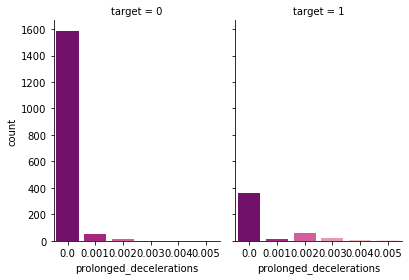

In [718]:
g = sns.catplot(x="prolonged_decelerations", col="target",
                data=df, kind="count",
                height=4, aspect=0.7)
#plt.title('Prolonged Deceleration by Fetal Health Outcome', pad=50, loc='right');

There are many more instances of no decelerations in the Normal class, and many more instances of longer decelerations in the At Risk class.

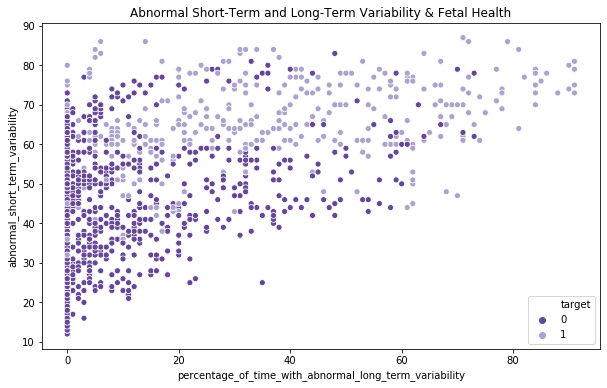

In [723]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="percentage_of_time_with_abnormal_long_term_variability", y="abnormal_short_term_variability", hue='target', data=df)
plt.title('Abnormal Short-Term and Long-Term Variability & Fetal Health');

The light purple points represent the At Risk class and the dark purple points represent the Normal class. From this scatter plot, it can be seen that the points with higher values for percentage of time with short- and long- term variability  are predominantly of the At Risk class, with only a few Normals peppered in there.

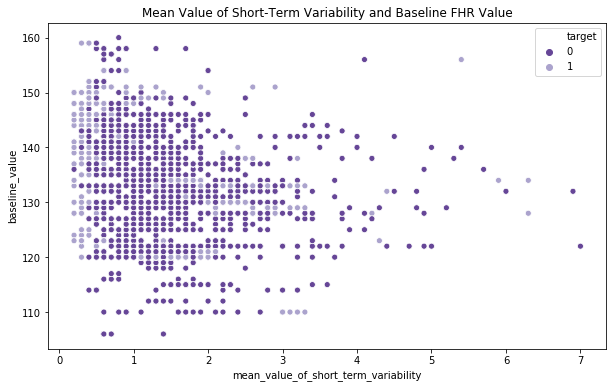

In [724]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="baseline_value", hue='target', data=df)
plt.title('Mean Value of Short-Term Variability and Baseline FHR Value');

When comparing baseline FHR value and mean value of short term variability, it is not as easy to distinguish a clear relationship between the classes.

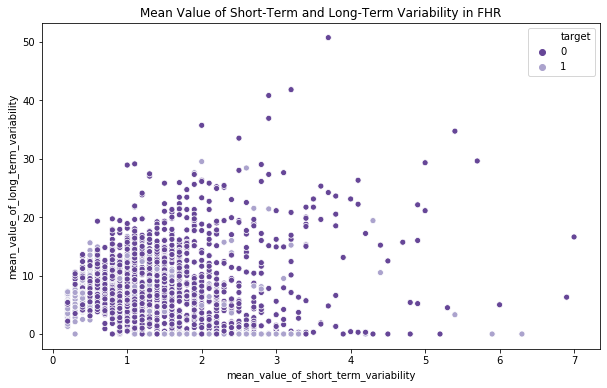

In [729]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="mean_value_of_long_term_variability", hue='target', data=df)
plt.title('Mean Value of Short-Term and Long-Term Variability in FHR');

It is again difficult to distinguish the pattern here. It is notable that there is no clear way to discern the two classes based on these features alone. I am very curious how well a model will perform on these dispersed features.

## Modeling

In [422]:
# setting target and features
y = df['target']
X = df.drop(columns='target')

# splitting the data into train and test sets
# using stratify parameter to make sure class ratios 
# are distributed evenly across train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#### Model #1 - Baseline Model

I began with a baseline "vanilla" model. I used a Decision Tree since they are known to work well with imbalanced data, such as my target fetal health variable. 

In [423]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [424]:
y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[484  13]
 [ 32 109]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       497
           1       0.89      0.77      0.83       141

    accuracy                           0.93       638
   macro avg       0.92      0.87      0.89       638
weighted avg       0.93      0.93      0.93       638

Recall score:  0.7730496453900709


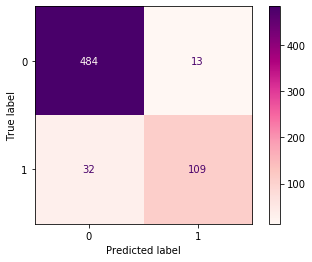

In [425]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test,cmap="RdPu")
plt.show()

While an accuracy of 93% sounds like a good metric, it is important to note that this model missed 32 members of the at-risk fetal health class. Since we are dealing with the health outcomes and lives of babies, this is simply not acceptable. I will be evaluating my models with a focus on recall/sensitivity in order to minimize false negatives or Type II errors. In this case, the baseline recall value is 77%.

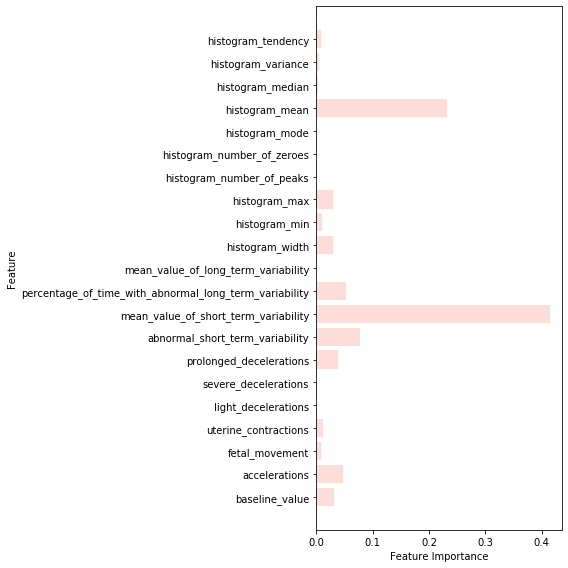

In [426]:
# plotting feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)
plt.tight_layout()
plt.savefig('./images/fig2.png')

The baseline decision tree model has allotted the most importance to abnormal short-term and long-term variability of fetal heart rate, as well as CTG histogram mean. Given the strong correlations noted earlier, it is not surprising that the classifier prioritized these particular features.

### Dealing With Imbalanced Classes

As explored previously, the fetal health outcome classes are quite imbalanced, with the majority being the negative (normal health) class. To address this, I once again ran the baseline decision tree model, but with the class_weight parameter set to "balanced". This adjusts so total weights are equal accross classes; in other words, members of the negative (normal health) class will be given less weight than members of the positive (at-risk) class. I opted to address this imbalance in this way so as not to sacrifice any data (as occurs in undersampling) or overfit to any duplicates from oversampling.

#### Model #2 - Decision Tree w/ Balanced Class Weight

In [427]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [428]:
y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[463  34]
 [ 23 118]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       497
           1       0.78      0.84      0.81       141

    accuracy                           0.91       638
   macro avg       0.86      0.88      0.87       638
weighted avg       0.91      0.91      0.91       638

Recall score:  0.8368794326241135


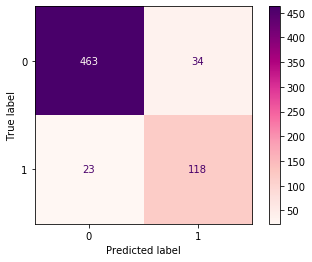

In [429]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test,cmap="RdPu")
plt.show()

After balancing the class weights, the model has been improved to a recall value of 84%. But it still missed 23 of the at-risk class, so it requires further improvement.

### Exploring Models With Pipelines & Grid Search
#### Preparing Functions and Generic Parameters
Now that I had my baseline model with which to compare future iterations, I opted to streamline the modeling process with sklearn pipelines and GridSearchCV to help choose the best hyperparamters for optimized recall. I began by writing a function to create a pipeline given a classifier.

In [203]:
# function to make a pipeline with classifier input
def pipe_maker(classifier):
    pipe = Pipeline([('scl', StandardScaler()),
                    ('clf', classifier(class_weight= 'balanced', random_state=42))])
    return pipe

I then wrote a function to create a grid search using a pipeline and predetermined paramaters.

In [224]:
# function to create a grid search containing pipeline
def gridsearch_maker(pipeline, params):
    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='recall',
                        cv=10,
                        n_jobs=-1)

In [225]:
# setting generic grid search parameters
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_small = [1.0, 0.5, 0.1]

I then wrote a function to find the best hyperparameters to optimize recall for a given model, print the classification report for the model with the best parameters, and print the confusion matrix for this model as well.

In [226]:
def find_best_recall(gridsearch):
    """ 
    Runs a grid search iterating through predefined grid params and returns best params to optimize recall score. 
  
    Fits classifier to X_train and y_train.
    Determines and prints best params for recall.
    Determines and prints best training set recall.
    Predicts on test data using best params.
    Prints best test set recall.
    Prints classification report for best model.
    Plots confusion matrix for best model.
  
    Parameters: 
    gridsearch: Predefined instance of GridsearchCV with parameters and estimator/pipeline already set.
  
    Returns: 
    Best parameters for particular grid search, based on recall score.
    Best training set recall.
    Best test set recall.
    Classification report for best model.
    Confusion matrix for best model.
  
    """
    # fitting the grid search objects
    best_recall = 0.0
    # fitting grid search
    gridsearch.fit(X_train, y_train)
    # best params
    print('Best params: %s' % gridsearch.best_params_)
    # best training data recall
    print('Best training recall: %.3f' % gridsearch.best_score_)
    # predict on test data with best params
    y_pred = gridsearch.predict(X_test)
    # test data recall with best params
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Recall score: ',recall_score(y_test, y_pred))
    # plotting confusion matrix
    plot_confusion_matrix(gridsearch, X_test, y_test,cmap="RdPu")
    plt.show()

#### Model #3 - Logistic Regression w/ Pipeline and Grid Search

I began with fitting a logistic regression model, optimized with a pipeline and grid search.

Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training recall: 0.927
Test set recall score for best params: 0.922 
[[419  78]
 [ 11 130]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       497
           1       0.62      0.92      0.74       141

    accuracy                           0.86       638
   macro avg       0.80      0.88      0.82       638
weighted avg       0.90      0.86      0.87       638

Recall score:  0.9219858156028369


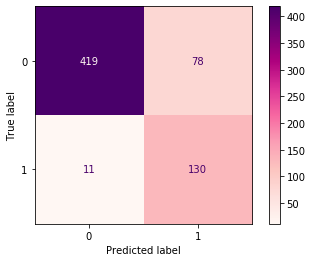

In [227]:
# fitting Logistic Regression pipeline
pipe_lr = pipe_maker(LogisticRegression)

# setting grid search parameters
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_small,
                   'clf__solver': ['liblinear']}]

# creating grid search object
gs_lr = gridsearch_maker(pipe_lr, grid_params_lr)

# finding best parameters for recall
find_best_recall(gs_lr)

According to my grid search, a logistic regression model with best parameters was pretty good, but not as good as my Decision Tree, with a best recall score of 92%.

#### Model #4 - Random Forest w/ Pipeline and Grid Search

Best params: {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 2}
Best training recall: 0.918
Test set recall score for best params: 0.936 
[[458  39]
 [  9 132]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       497
           1       0.77      0.94      0.85       141

    accuracy                           0.92       638
   macro avg       0.88      0.93      0.90       638
weighted avg       0.93      0.92      0.93       638

Recall score:  0.9361702127659575


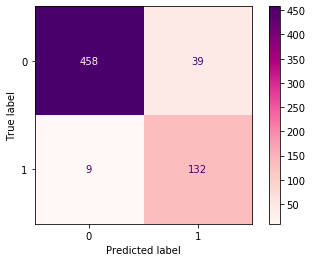

In [260]:
# fitting Random Forest pipeline
pipe_rf = pipe_maker(RandomForestClassifier)

# setting grid search parameters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# finding best parameters for recall
find_best_recall(gs_rf)

My Random Forest model was better, with a recall score of 93.6%.

#### Model #5 - Support Vector Machine w/ Pipeline and Grid Search

Best params: {'clf__C': 1, 'clf__kernel': 'rbf'}
Best training recall: 0.955
Test set recall score for best params: 0.943 
[[438  59]
 [  8 133]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       497
           1       0.69      0.94      0.80       141

    accuracy                           0.89       638
   macro avg       0.84      0.91      0.86       638
weighted avg       0.92      0.89      0.90       638

Recall score:  0.9432624113475178


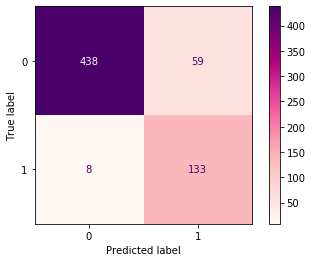

In [228]:
# fitting Support Vector Machine pipeline
pipe_svm = pipe_maker(svm.SVC)

# setting grid search parameters
grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': param_range}]

# creating grid search object
gs_svm = gridsearch_maker(pipe_svm, grid_params_svm)

# finding best parameters for recall
find_best_recall(gs_svm)

Better still was my SVM model with RBF (radial basis function) kernel, with a recall of 94.3%.

#### Model #6 - Extra Trees w/ Pipeline and Grid Search
When I read about the Extra Trees classifier, I had a feeling it might work well for this data. "This fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting." While this ensemble method is similar to Random Forest in that it uses a group of decision trees, it is different in that it randomly chooses the split point and does not calculate the optimal one. This also makes it a faster algorithm to work with than Random Forest. 

Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 6, 'clf__min_samples_split': 2}
Best training recall: 0.933
Test set recall score for best params: 0.972 
[[444  53]
 [  4 137]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       497
           1       0.72      0.97      0.83       141

    accuracy                           0.91       638
   macro avg       0.86      0.93      0.88       638
weighted avg       0.93      0.91      0.91       638

Recall score:  0.9716312056737588


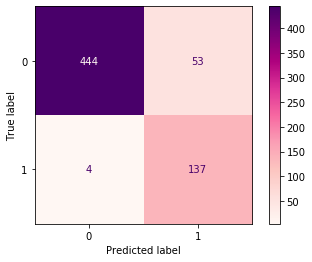

In [229]:
# fitting Extra Trees pipeline
pipe_et = pipe_maker(ExtraTreesClassifier)

# setting grid search parameters
grid_params_et = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_et = gridsearch_maker(pipe_et, grid_params_et)

# finding best parameters for recall
find_best_recall(gs_et)

This model using the Extra Trees Classifier was my best model, with a recall score of 97.2%. 

#### Model #7 - AutoML with TPOT
While I was pretty happy with the 97% recall, I was hoping to increase it still. So my final iteration utilized TPOT for automated model selection and hyperparameter tuning. "TPOT is a Python tool which automatically creates and optimizes machine learning pipelines using genetic programming. TPOT works in tandem with Scikit-learn, describing itself as a Scikit-learn wrapper. TPOT is open source, written in Python, and aimed at simplifying a machine learning process by way of an AutoML approach based on genetic programming. The end result is automated hyperparameter selection, modeling with a variety of algorithms, and exploration of numerous feature representations, all leading to iterative model building and model evaluation."

In [241]:
# constructing and fitting TPOT classifier
tpot = TPOTClassifier(template ='Selector-Transformer-Classifier', 
                      verbosity=1, 
                      scoring='recall',
                      n_jobs=-1,
                      random_state=42)
tpot.fit(X_train, y_train)

# saving best pipeline as Python script file
tpot.export('tpot_best_pipeline.py')

# predict on test data with best params
y_pred = tpot.predict(X_test)
# test data recall with best params
print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

Best pipeline: GaussianNB(Nystroem(RFE(input_matrix, criterion=gini, max_features=0.45, n_estimators=100, step=0.1), gamma=0.7000000000000001, kernel=rbf, n_components=3))
Test set recall score for best params: 1.000 
[[  0 497]
 [  0 141]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       497
           1       0.22      1.00      0.36       141

    accuracy                           0.22       638
   macro avg       0.11      0.50      0.18       638
weighted avg       0.05      0.22      0.08       638

Recall score:  1.0


/Users/dtunnicliffe/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dtunnicliffe/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dtunnicliffe/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

After taking almost 12 hours to finish optimizing, TPOT provided me with this "best" model. While the model has 100% recall, which is the metric I told it to prioritize, it has terrible scores for everything else. Upon inspection, it seems that it built a model to say that every single case is of the positive class, or at-risk fetal health outcome. That is how it is able to get such a high recall number; because it isn't actually predicting much of anything at all! While this was an interesting experience, I do not think I'd use TPOT to optimize recall in the future.

## Evaluation and Results

The positive class for fetal health is 'At Risk' and the negative class is 'Normal'. The objective is to minimize false negatives and err on the side of caution. Better safe than sorry! Being overly cautious is the ethical course of action when dealing with maternal-fetal health. Misclassifying a member of the 'Normal' class as 'At Risk' is a minor inconvenience (and likely a scare for the mother), but misclassifying a member of the 'At Risk' class as 'Normal' has far more serious consequences. I want to make sure that we catch every single baby that is in distress so that decisions can be made accordingly. Therefore, I have prioritized Recall/Sensitivity as the metric by which to evaluate the models. This will ensure that we capture all instances of the positive class, which makes this the most important metric for the problem at hand. By doing this, we avoid false negatives or Type II errors.  
That being said, my best model was the one using the Extra Trees Classifier. This model achieved a recall score of 97%, meaning that 97% of the at-risk class was captured by the model. It has an accuracy score of 91%, meaning that 91% of the total predictions made by the model were correct. It is important to note that while there is a trade-off between recall and precision, which affects accuracy, you simply cannot put a price on a human life. So I have chosen to prioritize recall at the expense of other metrics for this particular problem.  

F1=0.828, AUC=0.945


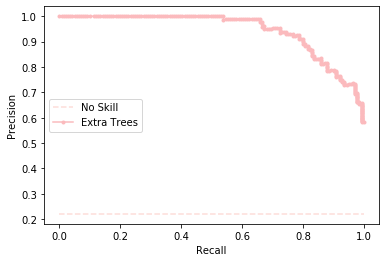

In [335]:
# plotting precision-recall curve
pipe_et.fit(X_train, y_train)
# predict probabilities
probs = pipe_et.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
y_pred = pipe_et.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, probs)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('F1=%.3f, AUC=%.3f' % (f1, auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Extra Trees')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

The precision-recall curve above shows that while recall was prioritized, the model still did pretty well with precision too. This is also demonstrated by the model's F1 score of 83%. I would have expected a much lower F1 with recall being heavily prioritized, but this indicates that the model is performing quite well. The AUC or Area Under the Curve of 94.5% also confirms that this model is working well.
Based on the performance of the model, especially the recall/sensitivity rate of 97%, I reject the null hypothesis that there is no relationship between automated CTG data and fetal health outcome.

In [431]:
features = ['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

I imported a library called ELI5 (Explain It Like I'm 5) to see feature importances for the Extra Trees pipeline model. 

In [442]:
eli5.explain_weights(pipe_et.named_steps['clf'], 
                     top=50, feature_names=features)

Explanation(estimator="ExtraTreesClassifier(class_weight='balanced', random_state=42)", description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='accelerations', weight=0.14537997094912353, std=0.09829823008799905, value=None), FeatureWeight(feature='abnormal_short_term_variability', weight=0.1398285025332784, std=0.09965114513976986, value=None), FeatureWeight(feature='percentage_of_time_with_abnormal_long_term_variability', weight=0.1029269017876261, std=0.07949983143735662, value=None), FeatureWeight(feature='mean_value_of_short_term_variability', weight=0.07734108732940971, std=0.07687589788382183, value=None), FeatureWeight(feature='histogram_mean', weight=0.06043342338800046, std=0.035735853716577046, value=None), FeatureWeight(feature='prolonged_decelerations', weight=0.059681443087005896, std=0.04084448362408927, value=None), FeatureWeight(feature='uterine_contractions', weight=0.04839988310709741, std=0.03293140270424001, value=None), FeatureWeight(feature='histogram_mode', weight=0.04634621867827609, std=0.029776840413834164, value=None), FeatureWeight(feature='histogram_median', weight=0.04225270777136116, std=0.024646670259980075, value=None), FeatureWeight(feature='histogram_min', weight=0.041429054530567715, std=0.03292049754425472, value=None), FeatureWeight(feature='baseline_value', weight=0.03471092166001534, std=0.021866715565832227, value=None), FeatureWeight(feature='histogram_variance', weight=0.032568735001761384, std=0.020561362042115738, value=None), FeatureWeight(feature='histogram_width', weight=0.029025753018356738, std=0.02268691491056873, value=None), FeatureWeight(feature='histogram_max', weight=0.026546856141123683, std=0.011817009721725018, value=None), FeatureWeight(feature='mean_value_of_long_term_variability', weight=0.026008570355598264, std=0.012313756370062979, value=None), FeatureWeight(feature='histogram_tendency', weight=0.02120212542485887, std=0.012878124172352741, value=None), FeatureWeight(feature='fetal_movement', weight=0.019166261303186848, std=0.009900397604551754, value=None), FeatureWeight(feature='histogram_number_of_peaks', weight=0.018505133148172804, std=0.00782759752116021, value=None), FeatureWeight(feature='light_decelerations', weight=0.015883771870218277, std=0.009269095479854945, value=None), FeatureWeight(feature='histogram_number_of_zeroes', weight=0.01036974414372435, std=0.00572409175488408, value=None), FeatureWeight(feature='severe_decelerations', weight=0.001992934771237112, std=0.003413322838634547, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

According to this breakdown, the most impactful features were accelerations, percentage of time with abnormal short term variability, percentage of time with abnormal long term variability, prolonged decelerations, and mean value of short term variability.

## Conclusion

In conclusion, cardiotocogram data provides easily accessible and interpretable insight into fetal health outcomes. ML models are able to predict if a fetus is in distress, using CTG data, with a high level of recall/sensitivity. Between the high predictive power of these models and the expert knowledge of obstetricians, fetal and maternal health could and should be prioritized. By doing this, yearly fetal mortality rates can be effectively reduced.

### Recommendations

1. Since I have shown that automated CTG data provides an ability to predict if a fetus in-utero is in distress with a recall/sensitivity rate of 97%, my main recommendation is that CTGs be performed as often as possible on expectant mothers. This is an easy and highly interpretable way to maintain the necessary level of care to preserve maternal and fetal health. It has been posed by obstetricians as a cost-effective option for achieving the goal of reducing maternal and fetal mortality, and based on my findings, cardiotocogram readings are able to predict fetal health outcome. 
2. I recommend that healthcare providers pay close attention to all measures of fetal heart rate, as these are the strongest predictors of at-risk fetal health outcomes. These measures include percentage of time with abnormal short-term variability, percentage of time with abnormal long-term variability, and prolonged decelerations.
3. My final recommendation appeals to the morals of healthcare providers. While we are all in the business of making money,  we need to place an emphasis on prioritizing fetal health and accepting that there will be false alarms that come with this. I recommend that you treat all at-risk indicators with urgency and a better-safe-than-sorry approach. By having a lower threshold for a higher level of care, and accepting the slight cost increase that may go along with that, you will benefit in the long run by having a greater track record of saving babies and mothers, and be able to improve your practice’s fetal mortality stats -- while also saving lives and contributing to this global cause. 

### In the future...
As mainstreamed CTG use is implemented for all pregnant patients, we would use these new observations and fetal health outcomes to further improve the data and modeling capabilities. While the model is already very efficient, we could improve the sensitivity rate even further by adding more data, in an effort to never miss a single instance of at-risk fetal health. By adding more patients’ CTG metrics to our dataset, and adding new features such as self-reported answers to a patient questionnaire, we could find new trends and have more information with which to make predictions. 
With the data we have already, there are many features pertaining to the fetal heart rate histograms generated by the CTG exam. While we have gone over the impact of heart rate variability and prolonged deceleration, we have not yet explored the impact of these CTG-generated histograms and what their values may mean for fetal health predictions. 